In [1]:
# !pip install SVM

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
# print(data.head(20))
# data.shape

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [6]:
# Converting categorical columns to numerical
# arr = set(arr)
# print(arr)
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

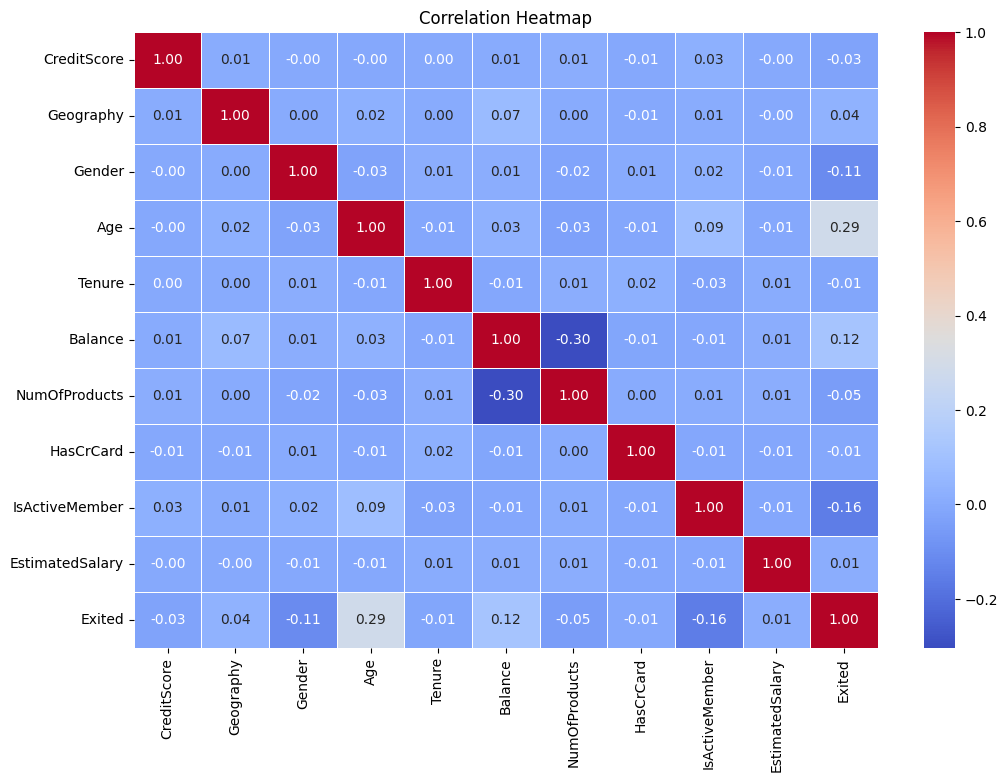

In [7]:
# Drop non-numeric columns
import matplotlib.pyplot as plt
numeric_data = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
x = df.drop("Exited",axis=1)
y = df['Exited']
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [9]:
scaler = StandardScaler()
scaler.fit_transform(x)
X = scaler.transform(x)
# x_scaled = x.values
# print(X)

[[-0.32622142 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Initialize and train the XGBoost classifier
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xg.predict(x_test)
print(f"Model score: {xg.score(x_train, y_train)}")

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Computing R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')

# Computing RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')


Model score: 0.95425
Accuracy: 85.00%


In [12]:
# x_test,y_pred,y_test
# y_test = np.array(y_test)
# x_test,y_pred,y_test
x_ax =  np.arange(0,len(x_test))
# print(x_ax)

C:\Users\coolp\AppData\Local\Temp\ipykernel_5732\4046923790.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(x_ax[:100],y_test[:100], label='Atual Labels',  color='g')


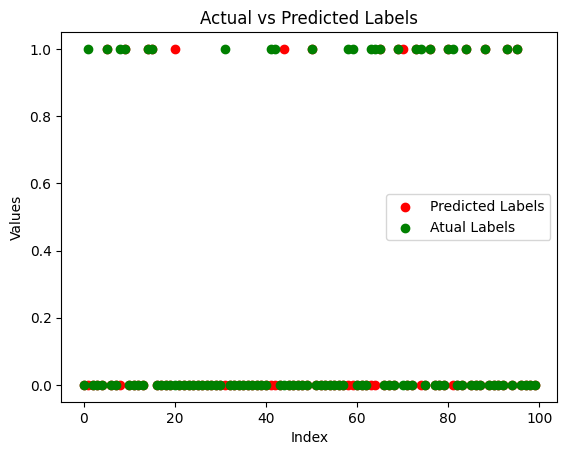

In [13]:
# plt.figure(figsize=(5, 6))
# plt.scatter(x_ax[:100],y_pred[:100], label='Predicted Labels', color='r')
# plt.scatter(x_ax[:100],y_test[:100], label='Atual Labels',  color='g')

#     # Adding labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Actual vs Predicted Labels')

#     # Adding legend
# plt.legend()

#     # Show the plot
# plt.show()

In [14]:
# Train a Support vector classifier
# clf = SVC()
# clf.fit(x_train, y_train)

# # Evaluate the model
# y_pred2 = clf.predict(x_test)
# print(f"Model score: {clf.score(x_train, y_train)}")

# # print("Classification Report:")
# # print(classification_report(y_test, y_pred))
# # print(f"test: {y_test},pred{y_pred2}")
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy*100:.2f}%")

# Model score: 0.862
# Accuracy: 85.00%

Model score: 0.862
Accuracy: 85.00%


In [15]:
# # Hyperparameter tuning
# param_gd = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100], 
#     'penalty': ['l1', 'l2'],  
#     'max_iter': [1000, 5000, 10000]
# }

In [16]:
# log_reg = LogisticRegression(tol=0.001)
# grid_search  = GridSearchCV(log_reg,param_gd,cv=5,verbose=1,n_jobs=-1)
# model = grid_search.best_estimator_
# # model = LogisticRegression()
# # model.fit(x_train, y_train)

In [17]:
# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(model, x_scaled, y, cv=5)
# print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# # Final evaluation on test set
# y_pred = model.predict(x_test)
# print(y_pred)
# y_pred_bin = [1 if pred > 0.5 else 0 for pred in y_pred]
# accuracy = accuracy_score(y_test, y_pred_bin)
# print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

# # Compute R^2 score
# r2 = r2_score(y_test, y_pred_bin)
# print(f'R^2 Score: {r2:.4f}')

# # Compute RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_bin))
# print(f'RMSE: {rmse:.4f}')

In [18]:
# rf = RandomForestRegressor(random_state=42)

In [19]:
# # Initializing the Random Forest Regressor
# # Hyperparameter tuning using GridSearchCV
# param_grid_rf = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(x_train, y_train)

In [20]:
# # Predicting using the best estimator
# best_rf = grid_search.best_estimator_
# y_pred_rf = best_rf.predict(x_test)
# # print(y_test)
# y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred_rf]
# print(y_pred_binary)

# # import matplotlib.pyplot as plt
# # plt.figure(figsize=(5, 6))
# # plt.plot(y_pred_rf, label='Predicted Labels', marker='x')

# #     # Adding labels and title
# # plt.xlabel('Index')
# # plt.ylabel('Values')
# # plt.title('Actual vs Predicted Labels')

# #     # Adding legend
# # plt.legend()

# #     # Show the plot
# # plt.show()

In [21]:
# # Evaluate the model using cross-validation
# cv_scores_rf = cross_val_score(best_rf, x_scaled, y, cv=5)
# print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores_rf) * 100:.2f}%")

# accuracy_rf = accuracy_score(y_test, y_pred_binary)
# print(f"Accuracy on Test Set: {accuracy_rf * 100:.2f}%")

# # Compute R^2 score
# r2 = r2_score(y_test, y_pred_binary)
# print(f'R^2 Score: {r2:.4f}')

# # Compute RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_binary))
# print(f'RMSE: {rmse:.4f}')

In [22]:
# from sklearn.ensemble import GradientBoostingClassifier

In [23]:
# gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# gbc.fit(x_train, y_train)

# # Predictions
# y_pred_prob = gbc.predict_proba(x_test)[:, 1]  # Probabilities of the positive class

# # Converting probabilities to 0 or 1 based on threshold
# y_pred_roundoff = (y_pred_prob > 0.5).astype(int)
# print(y_pred_roundoff)

In [24]:
# # Calculating accuracy
# accuracy = accuracy_score(y_test, y_pred_roundoff)
# print(f"Accuracy: {accuracy*100:.2f}%")

# # MSE
# mse = mean_squared_error(y_test, y_pred_roundoff)
# print(f"Mean Squared Error: {mse:.4f}")